In [1]:
import glob as glob
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error


# qm8


In [2]:
! ls ../../../../data/saved_models/final_set/qm8/qm8_learning_results_dict.json

../../../../data/saved_models/final_set/qm8/qm8_learning_results_dict.json


In [3]:
! ls ../../../../data/saved_models/final_set/chemprop/qm8/learning/base/

test_preds_qm8_10000.csv  test_preds_qm8_1000.csv  test_preds_qm8_100.csv


In [29]:
chemprop_base_root = "../../../../data/saved_models/final_set/chemprop/qm8/learning/base/"
chemprop_qtaim_root = "../../../../data/saved_models/final_set/chemprop/qm8/learning/qtaim/"
# qtaim embed results dict
qm8_results = (
    "../../../../data/saved_models/final_set/qm8/qm8_learning_results_dict.json"
)
qm8_results = json.load(open(qm8_results, "r"))

In [30]:
qm8_results.keys()

dict_keys(['qtaim_100', 'qtaim_1000', 'qtaim_10000', 'qtaim_bl_100', 'qtaim_bl_1000', 'qtaim_bl_10000', 'non_qtaim_100', 'non_qtaim_1000', 'non_qtaim_10000', 'non_qtaim_bl_100', 'non_qtaim_bl_1000', 'non_qtaim_bl_10000'])

non_qtaim_bl 100 0.03114473819732666 0.029361534863710403 0.03772852197289467
non_qtaim_bl 1000 0.5235662162303925 0.019666889682412148 0.02647790778428316
non_qtaim_bl 10000 0.8193051517009735 0.011676833033561707 0.016007447615265846
qtaim 100 0.14137759804725647 0.027036847546696663 0.03568599745631218
qtaim 1000 0.6601053774356842 0.015385307371616364 0.021855652332305908
qtaim 10000 0.906121164560318 0.008523795753717422 0.011473777703940868


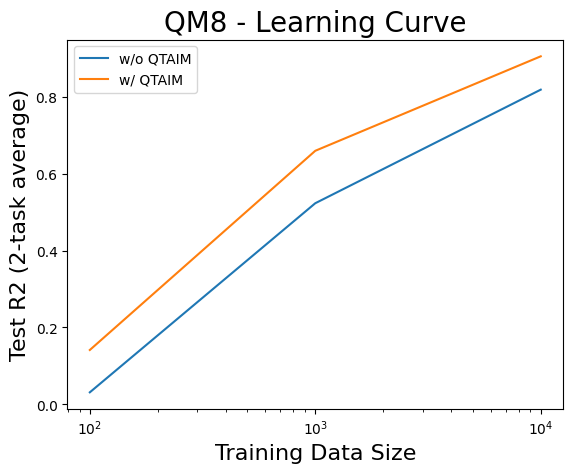

In [31]:
partitions = ["non_qtaim_bl", "qtaim"]
data_sizes = [100, 1000, 10000]

# iterate through partitions and sizes then plot
for part in partitions:
    temp_r2 = []
    temp_mae = []
    temp_mse = []
    for size in data_sizes:
        temp_r2.append(
            np.array(qm8_results[part + "_" + str(size)]["r2_metrics"]).mean()
        )
        temp_mae.append(
            np.array(qm8_results[part + "_" + str(size)]["mae_metrics"]).mean()
        )
        temp_mse.append(
            np.array(qm8_results[part + "_" + str(size)]["mse_metrics"]).mean()
        )
        print(part, size, temp_r2[-1], temp_mae[-1], temp_mse[-1])
    # plot with some smoothing
    x = np.array(data_sizes)
    y = np.array(temp_r2)

    if part == "qtaim":
        part_label = "w/ QTAIM"
    elif part == "non_qtaim_bl":
        part_label = "w/o QTAIM"
    plt.plot(x, y, label=part_label)
# log scale x
plt.xscale("log")
plt.title("QM8 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test R2 (2-task average)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("qm8_learning_curve_r2.png", dpi=300)

plt.show()
plt.close()

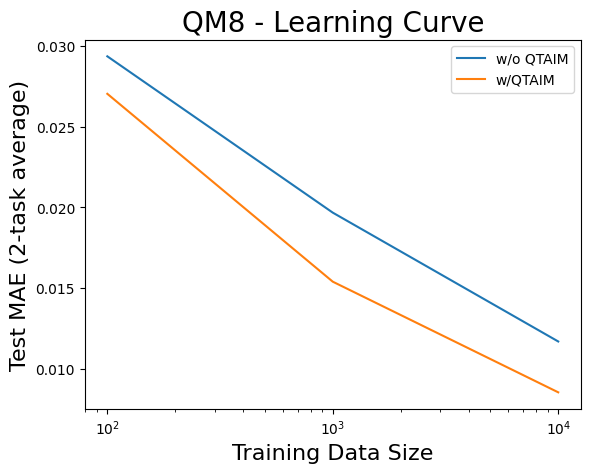

In [7]:
partitions = ["non_qtaim_bl", "qtaim"]
data_sizes = [100, 1000, 10000]

# iterate through partitions and sizes then plot
for part in partitions:
    temp_r2 = []
    temp_mae = []
    temp_mse = []
    for size in data_sizes:
        temp_r2.append(
            np.array(qm8_results[part + "_" + str(size)]["r2_metrics"]).mean()
        )
        temp_mae.append(
            np.array(qm8_results[part + "_" + str(size)]["mae_metrics"]).mean()
        )
        temp_mse.append(
            np.array(qm8_results[part + "_" + str(size)]["mse_metrics"]).mean()
        )
    # plot with some smoothing
    x = np.array(data_sizes)
    y = np.array(temp_mae)
    if part == "qtaim":
        part_label = "w/QTAIM"
    elif part == "non_qtaim_bl":
        part_label = "w/o QTAIM"
        
    plt.plot(x, y, label=part_label)
# log scale x
plt.xscale("log")
plt.title("QM8 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test MAE (2-task average)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("qm8_learning_curve_mae.png", dpi=300)

plt.show()
plt.close()

In [28]:


chemprop_base_root = "../../../../data/saved_models/final_set/chemprop/qm8/learning/base/"
chemprop_qtaim_root = "../../../../data/saved_models/final_set/chemprop/qm8/learning/qtaim/"
test_qm8 = "../benchmark_data/qm8_test_chemprop.csv"
df_qm8 = pd.read_csv(test_qm8)

list_chemprop_base = glob.glob(chemprop_base_root + "*.csv")
list_chemprop_qtaim = glob.glob(chemprop_qtaim_root + "*.csv")

chemprop_base_res = {}
chemprop_qtaim_res = {}
name_list = ["CC2_E1", "CC2_E2"]
chemprop_size_list = [100, 1000, 10000] 

for file in list_chemprop_base:
    mae_list = []
    r2_list = []

    file_size = file.split(".")[-2].split("_")[-1]
    df = pd.read_csv(file)
    
    for key in name_list:
        mae_list.append(mean_absolute_error(df_qm8[key], df[key]))
        # compute r2
        r2_list.append(r2_score(df_qm8[key], df[key]))
    
    
    df = pd.read_csv(file)
    chemprop_base_res[file_size] = {}
    chemprop_base_res[file_size]["r2"] = np.mean(r2_list)
    chemprop_base_res[file_size]["mae"] = np.mean(mae_list)

for file in list_chemprop_qtaim:
    mae_list = []
    r2_list = []

    file_size = file.split(".")[-2].split("_")[-1]
    df = pd.read_csv(file)
    
    for key in name_list:
        mae_list.append(mean_absolute_error(df_qm8[key], df[key]))
        # compute r2
        r2_list.append(r2_score(df_qm8[key], df[key]))
    
    
    df = pd.read_csv(file)
    chemprop_qtaim_res[file_size] = {}
    chemprop_qtaim_res[file_size]["r2"] = np.mean(r2_list)
    chemprop_qtaim_res[file_size]["mae"] = np.mean(mae_list)


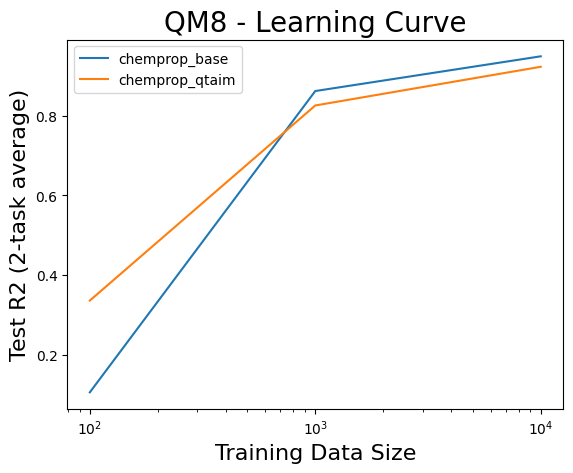

In [12]:
chemprop_size = [100, 1000, 10000]

# iterate through partitions and sizes then plot
x = np.array(chemprop_size)
y_r2 = np.array([chemprop_base_res[str(size)]["r2"] for size in chemprop_size])
y_mae = np.array([chemprop_base_res[str(size)]["mae"] for size in chemprop_size])
plt.plot(x, y_r2, label="chemprop_base")
y_r2_qtaim = np.array([chemprop_qtaim_res[str(size)]["r2"] for size in chemprop_size])
y_mae_qtaim = np.array([chemprop_qtaim_res[str(size)]["mae"] for size in chemprop_size])
plt.plot(x, y_r2_qtaim, label="chemprop_qtaim")

# log scale x
plt.xscale("log")
plt.title("QM8 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test R2 (2-task average)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("qm8_learning_curve_r2.png", dpi=300)

plt.show()
plt.close()

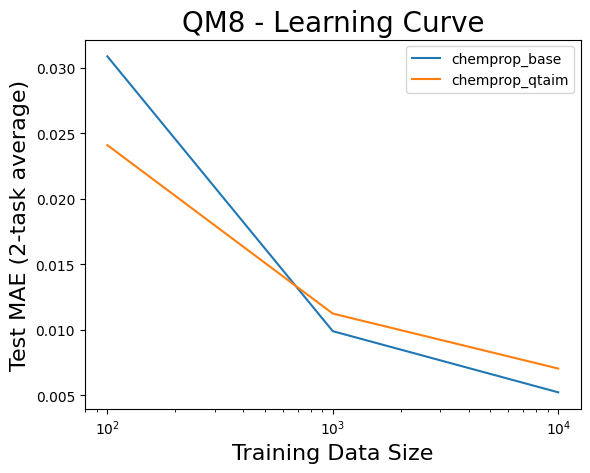

In [10]:
chemprop_size = [100, 1000, 10000]

# iterate through partitions and sizes then plot
x = np.array(chemprop_size)
plt.plot(x, y_mae, label="chemprop_base")
plt.plot(x, y_mae_qtaim, label="chemprop_qtaim")

# log scale x
plt.xscale("log")
plt.title("QM8 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test MAE (2-task average)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("qm8_learning_curve_mae.png", dpi=300)

plt.show()

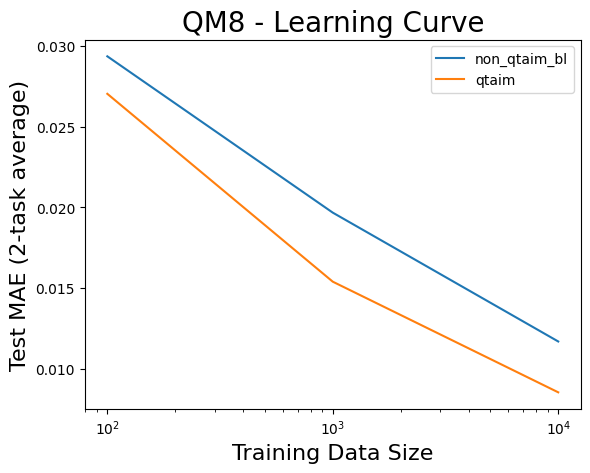

In [13]:
partitions = ["non_qtaim_bl", "qtaim"]
data_sizes = [100, 1000, 10000]

# iterate through partitions and sizes then plot
for part in partitions:
    temp_r2 = []
    temp_mae = []
    temp_mse = []
    for size in data_sizes:
        temp_r2.append(
            np.array(qm8_results[part + "_" + str(size)]["r2_metrics"]).mean()
        )
        temp_mae.append(
            np.array(qm8_results[part + "_" + str(size)]["mae_metrics"]).mean()
        )
        temp_mse.append(
            np.array(qm8_results[part + "_" + str(size)]["mse_metrics"]).mean()
        )
    # plot with some smoothing
    x = np.array(data_sizes)
    y = np.array(temp_mae)

    if part == "qtaim_bl":
        part_label = "w/ QTAIM"
    elif part == "non_qtaim_bl":
        part_label = "w/o QTAIM"
    plt.plot(x, y, label=part_label)


# log scale x
    

chemprop_size = [100, 1000, 10000]
# iterate through partitions and sizes then plot
x = np.array(chemprop_size)


plt.xscale("log")
plt.title("QM8 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test MAE (2-task average)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("qm8_learning_curve_mae.png", dpi=300)

plt.show()
plt.close()

# QM9


In [14]:
chemprop_base_root = "../../../../data/saved_models/final_set/chemprop/qm9/learning/base/"
chemprop_qtaim_root = "../../../../data/saved_models/final_set/chemprop/qm9/learning/qtaim/"
# qtaim embed results dict
qm9_results = (
    "../../../../data/saved_models/final_set/qm9_intrinsic/learning/qm9_learning_results_dict.json"
)
qm9_results = json.load(open(qm9_results, "r"))

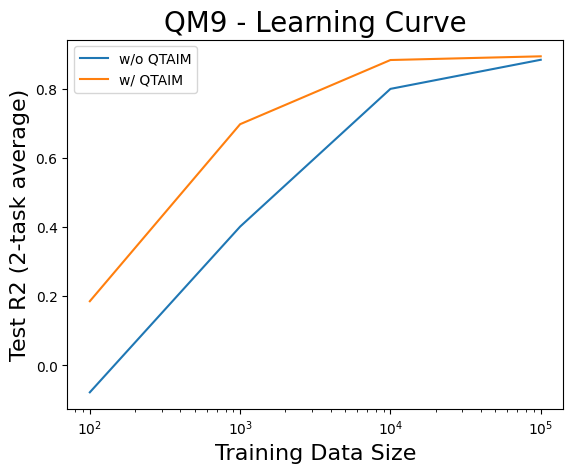

In [21]:
partitions = ["non_qtaim_bl",  "qtaim_bl"]
data_sizes = [100, 1000, 10000, 100000]

# iterate through partitions and sizes then plot
for part in partitions:
    temp_r2 = []
    temp_mae = []
    temp_mse = []
    for size in data_sizes:
        temp_r2.append(
            np.array(qm9_results[part + "_" + str(size)]["r2_metrics"]).mean()
        )
        temp_mae.append(
            np.array(qm9_results[part + "_" + str(size)]["mae_metrics"]).mean()
        )
        temp_mse.append(
            np.array(qm9_results[part + "_" + str(size)]["mse_metrics"]).mean()
        )
        #print(part, size, temp_r2[-1], temp_mae[-1], temp_mse[-1])
    # plot with some smoothing
    x = np.array(data_sizes)
    y = np.array(temp_r2)
    if part == "qtaim_bl":
        part_label = "w/ QTAIM"
    elif part == "non_qtaim_bl":
        part_label = "w/o QTAIM"
    plt.plot(x, y, label=part_label)
# log scale x
plt.xscale("log")
plt.title("QM9 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test R2 (2-task average)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("qm9_learning_curve_r2.png", dpi=300)

plt.show()
plt.close()

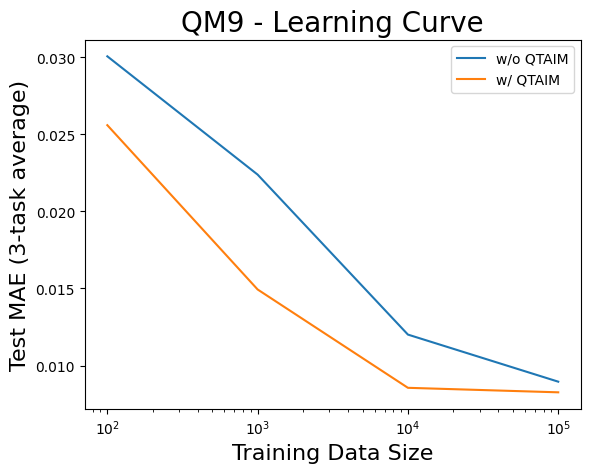

In [26]:
partitions = ["non_qtaim_bl",  "qtaim_bl"]
data_sizes = [100, 1000, 10000, 100000]

# iterate through partitions and sizes then plot
for part in partitions:
    temp_r2 = []
    temp_mae = []
    temp_mse = []
    for size in data_sizes:
        temp_r2.append(
            np.array(qm9_results[part + "_" + str(size)]["r2_metrics"]).mean()
        )
        temp_mae.append(
            np.array(qm9_results[part + "_" + str(size)]["mae_metrics"]).mean()
        )
        temp_mse.append(
            np.array(qm9_results[part + "_" + str(size)]["mse_metrics"]).mean()
        )
        #print(part, size, temp_r2[-1], temp_mae[-1], temp_mse[-1])
    # plot with some smoothing
    x = np.array(data_sizes)
    y = np.array(temp_mae)
    if part == "qtaim_bl":
        part_label = "w/ QTAIM"
    elif part == "non_qtaim_bl":
        part_label = "w/o QTAIM"
    plt.plot(x, y, label=part_label)
# log scale x
plt.xscale("log")
plt.title("QM9 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test MAE (3-task average)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("qm9_learning_curve_mae.png", dpi=300)

plt.show()
plt.close()

In [18]:
chemprop_base_root = "../../../../data/saved_models/final_set/chemprop/qm9/learning/base/"
chemprop_qtaim_root = "../../../../data/saved_models/final_set/chemprop/qm9/learning/qtaim/"
test_qm8 = "../benchmark_data/qm9_test_chemprop.csv"
df_qm8 = pd.read_csv(test_qm8)

list_chemprop_base = glob.glob(chemprop_base_root + "*.csv")
list_chemprop_qtaim = glob.glob(chemprop_qtaim_root + "*.csv")

chemprop_base_res = {}
chemprop_qtaim_res = {}
name_list =  ["homo", "lumo", "gap"]
chemprop_size_list = [100, 1000, 10000, 100000] 

for file in list_chemprop_base:
    mae_list = []
    r2_list = []

    file_size = file.split(".")[-2].split("_")[-1]
    df = pd.read_csv(file)
    
    for key in name_list:
        mae_list.append(mean_absolute_error(df_qm8[key], df[key]))
        # compute r2
        r2_list.append(r2_score(df_qm8[key], df[key]))
    
    
    df = pd.read_csv(file)
    chemprop_base_res[file_size] = {}
    chemprop_base_res[file_size]["r2"] = np.mean(r2_list)
    chemprop_base_res[file_size]["mae"] = np.mean(mae_list)

for file in list_chemprop_qtaim:
    mae_list = []
    r2_list = []

    file_size = file.split(".")[-2].split("_")[-1]
    df = pd.read_csv(file)
    
    for key in name_list:
        mae_list.append(mean_absolute_error(df_qm8[key], df[key]))
        # compute r2
        r2_list.append(r2_score(df_qm8[key], df[key]))
    
    
    df = pd.read_csv(file)
    chemprop_qtaim_res[file_size] = {}
    chemprop_qtaim_res[file_size]["r2"] = np.mean(r2_list)
    chemprop_qtaim_res[file_size]["mae"] = np.mean(mae_list)


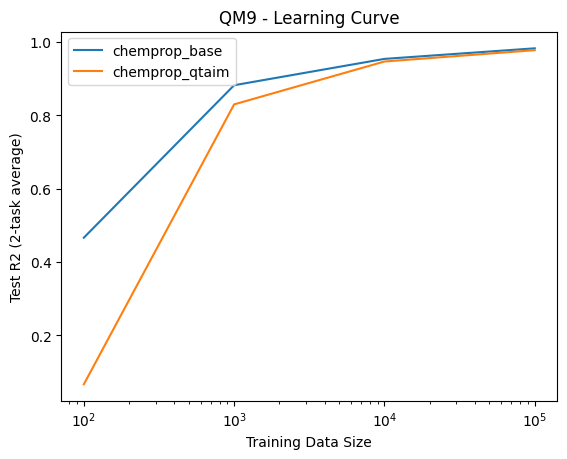

In [79]:
chemprop_size = [100, 1000, 10000, 100000]

# iterate through partitions and sizes then plot
x = np.array(chemprop_size)
y_r2 = np.array([chemprop_base_res[str(size)]["r2"] for size in chemprop_size])
y_mae = np.array([chemprop_base_res[str(size)]["mae"] for size in chemprop_size])
plt.plot(x, y_r2, label="chemprop_base")
y_r2_qtaim = np.array([chemprop_qtaim_res[str(size)]["r2"] for size in chemprop_size])
y_mae_qtaim = np.array([chemprop_qtaim_res[str(size)]["mae"] for size in chemprop_size])
plt.plot(x, y_r2_qtaim, label="chemprop_qtaim")

# log scale x
plt.xscale("log")
plt.title("QM9 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test R2 (2-task average)", fontsize=16)
plt.legend()


plt.show()

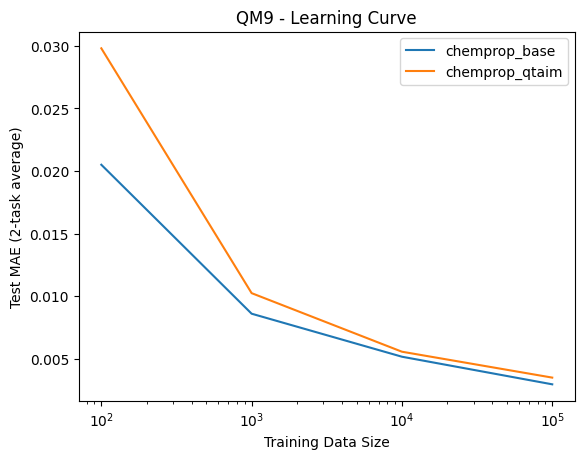

In [80]:
# iterate through partitions and sizes then plot
plt.plot(x, y_mae, label="chemprop_base")
plt.plot(x, y_mae_qtaim, label="chemprop_qtaim")

# log scale x
plt.xscale("log")
plt.title("QM9 - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test MAE (2-task average)", fontsize=16)
plt.legend()


plt.show()

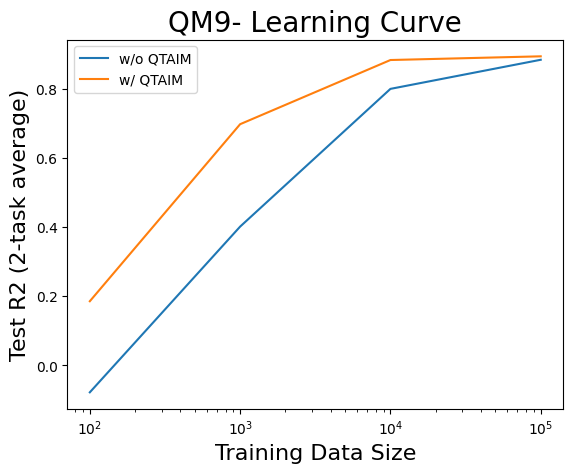

In [25]:
partitions = ["non_qtaim_bl", "qtaim_bl"]
data_sizes = [100, 1000, 10000, 100000]

# iterate through partitions and sizes then plot
for part in partitions:
    temp_r2 = []
    temp_mae = []
    temp_mse = []
    for size in data_sizes:
        temp_r2.append(
            np.array(qm9_results[part + "_" + str(size)]["r2_metrics"]).mean()
        )
        temp_mae.append(
            np.array(qm9_results[part + "_" + str(size)]["mae_metrics"]).mean()
        )
        temp_mse.append(
            np.array(qm9_results[part + "_" + str(size)]["mse_metrics"]).mean()
        )
    # plot with some smoothing
    x = np.array(data_sizes)
    y = np.array(temp_r2)

    if part == "qtaim_bl":
        part_label = "w/ QTAIM"
    elif part == "non_qtaim_bl":
        part_label = "w/o QTAIM"
    plt.plot(x, y, label=part_label)

    
# log scale x
    

data_sizes = [100, 1000, 10000, 100000]
# iterate through partitions and sizes then plot
x = np.array(chemprop_size)
#plt.plot(x, y_r2, label="chemprop_base")
#plt.plot(x, y_r2_qtaim, label="chemprop_qtaim")


plt.xscale("log")
plt.title("QM9- Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test R2 (2-task average)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("qm9_learning_curve_mae.png", dpi=300)

plt.show()
plt.close()

# LIBE


In [22]:
libe_results = (
    "../../../../data/saved_models/final_set/libe_instrinsic/libe_learning_results_dict.json"
)
libe_results = json.load(open(libe_results, "r"))

qtaim_bl 100 241.60392582416534
qtaim_bl 1000 114.11316692829132
qtaim_bl 10000 75.60145109891891
non_qtaim 100 219.68907117843628
non_qtaim 1000 122.16237187385559
non_qtaim 10000 88.65641057491302


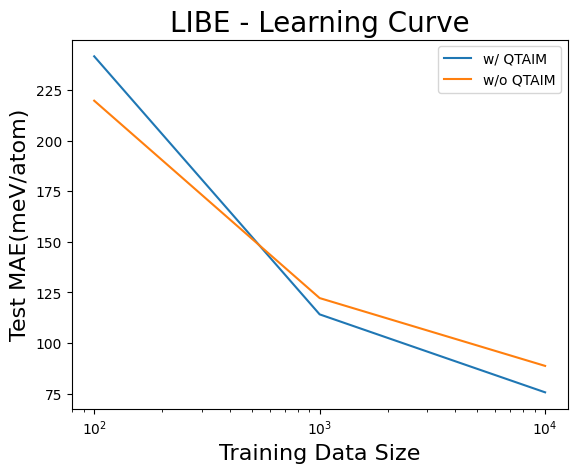

In [27]:
partitions = ["qtaim_bl", "non_qtaim"]
data_sizes = [100, 1000, 10000]

# iterate through partitions and sizes then plot
for part in partitions:
    temp_mae = []
    temp_ewt = []
    for size in data_sizes:
        temp_mae.append(
            np.array(libe_results[part + "_" + str(size)]["mean_mae_per_atom"]).mean() * 1000
        )

        print(part, size, temp_mae[-1])
    # plot with some smoothing
    x = np.array(data_sizes)
    y = np.array(temp_mae)

    if part == "qtaim_bl":
        part_label = "w/ QTAIM"
    elif part == "non_qtaim":
        part_label = "w/o QTAIM"
    plt.plot(x, y, label=part_label)
    
# log scale x
plt.xscale("log")
plt.title("LIBE - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test MAE(meV/atom)", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("libe_learning_curve_mae.png", dpi=300)

plt.show()
plt.close()

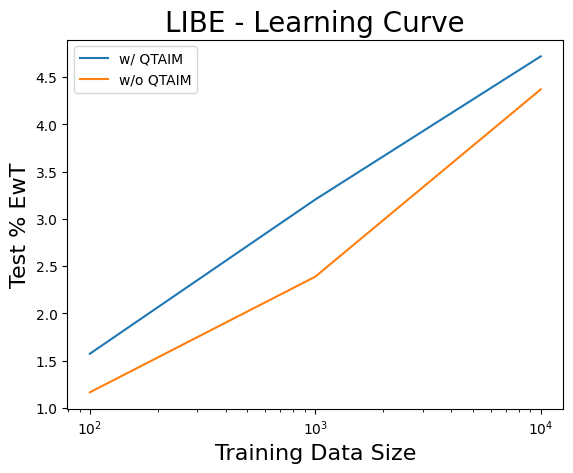

In [28]:
partitions = ["qtaim_bl", "non_qtaim"]
data_sizes = [100, 1000, 10000]

# iterate through partitions and sizes then plot
for part in partitions:
    temp_ewt = []
    for size in data_sizes:
        temp_ewt.append(
            np.array(libe_results[part + "_" + str(size)]["ewt"]).mean() * 100
        )

    # plot with some smoothing
    x = np.array(data_sizes)
    y = np.array(temp_ewt)
    if part == "qtaim_bl":
        part_label = "w/ QTAIM"
    elif part == "non_qtaim":
        part_label = "w/o QTAIM"
    plt.plot(x, y, label=part_label)
# log scale x
plt.xscale("log")
plt.title("LIBE - Learning Curve", fontsize=20)
plt.xlabel("Training Data Size", fontsize=16)
plt.ylabel("Test % EwT", fontsize=16)
plt.legend()
# increase dpi
plt.savefig("libe_learning_curve_ewt.png", dpi=300)

plt.show()
plt.close()